<a href="https://colab.research.google.com/github/taruj/Advanced-Regression-Assignment/blob/main/Advanced_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
`Surprise Housing` a US Based Housing company plans to enter the Australian market. The company is looking at prospective properties to buy to enter the market.

Before investing the company would like to `predict the value` of the prospective properties and then decide to invest (or not). 

The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company would also like to know `which factors (features of the houses) that are significant` in predicting the price of a house, and what is the impact of those variables in deciding the price of the house.

### Technical Goals
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables

### Approach for the Solution
- Exploratory Data Analysis 
- Data cleaning
- Data preparation 
  - Encoding, standardization and normalization
- Model building
- Conclusions 

## Python Notebook Notes
1. Terms - Variable / Feature / Column is used an interchangeable manner. 
2. Conclusion - All conclusions are in <font color="blue"> Blue Color </font>
3. Cautions - All Cautions / Warnings are in <font color="red"> Red Color </font>


Source: "The machine learning community calls them features (also attributes or inputs).  There is a subtle difference in meaning.  In predictive modeling, depending on the nature of the data, considerable work may be required to transform and winnow down data and text to a usable set of predictors.  This process is termed “feature engineering.”  The comparable term in statistics – “variable selection” – does not imply such a wide ranging process." https://www.statistics.com/02-03-2015-week-5-features-vs-variables/

## Import Libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

# Vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the Dataset

from google.colab import drive
drive.mount('/content/drive')

data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Adv-Reg-Assign.csv')
## Data Dictionary: https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Basic Data Exploration

In [2]:
## Get Size of dataset

print(data.shape)


(1460, 81)


<font color="blue"> 1460 Row and 81 Columns

In [3]:
## Identify Features containing less than 60% data 
nulls_data = round(data.isnull().sum()/len(data.index)*100,2)
nulls_data = nulls_data[nulls_data > 40]
nulls_data.sort_values(ascending=False)


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
dtype: float64

<font color="blue"> The following features have more than 40% missing data.

In [4]:
## Get Categorical and Numerical Data counts

categorical = []
numerical = []
for i in data.columns:
    if data[i].dtypes != 'O':
        numerical.append(i)
    else:
        categorical.append(i)
print("Numerical features: {} and Categorical Features: {}".format(len(numerical), len(categorical)))

Numerical features: 38 and Categorical Features: 43


<font color="blue"> Numerical features: 38 and Categorical Features: 43

In [5]:
## Look at raw data
pd.set_option('display.max_columns',81)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


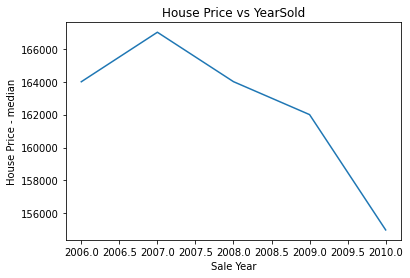

In [7]:
## Evaluate median price changes vs with the year
## This is based on intuation that as the property ages there will be a decline 
data['YrSold'] = data['YrSold'].astype('int')
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sale Year')
plt.ylabel('House Price - median')
plt.title("House Price vs YearSold")
plt.show()

<font color = "blue"> Sharp decline in house prices can be observed following 2007 and 2008 housing bubble crash </font>

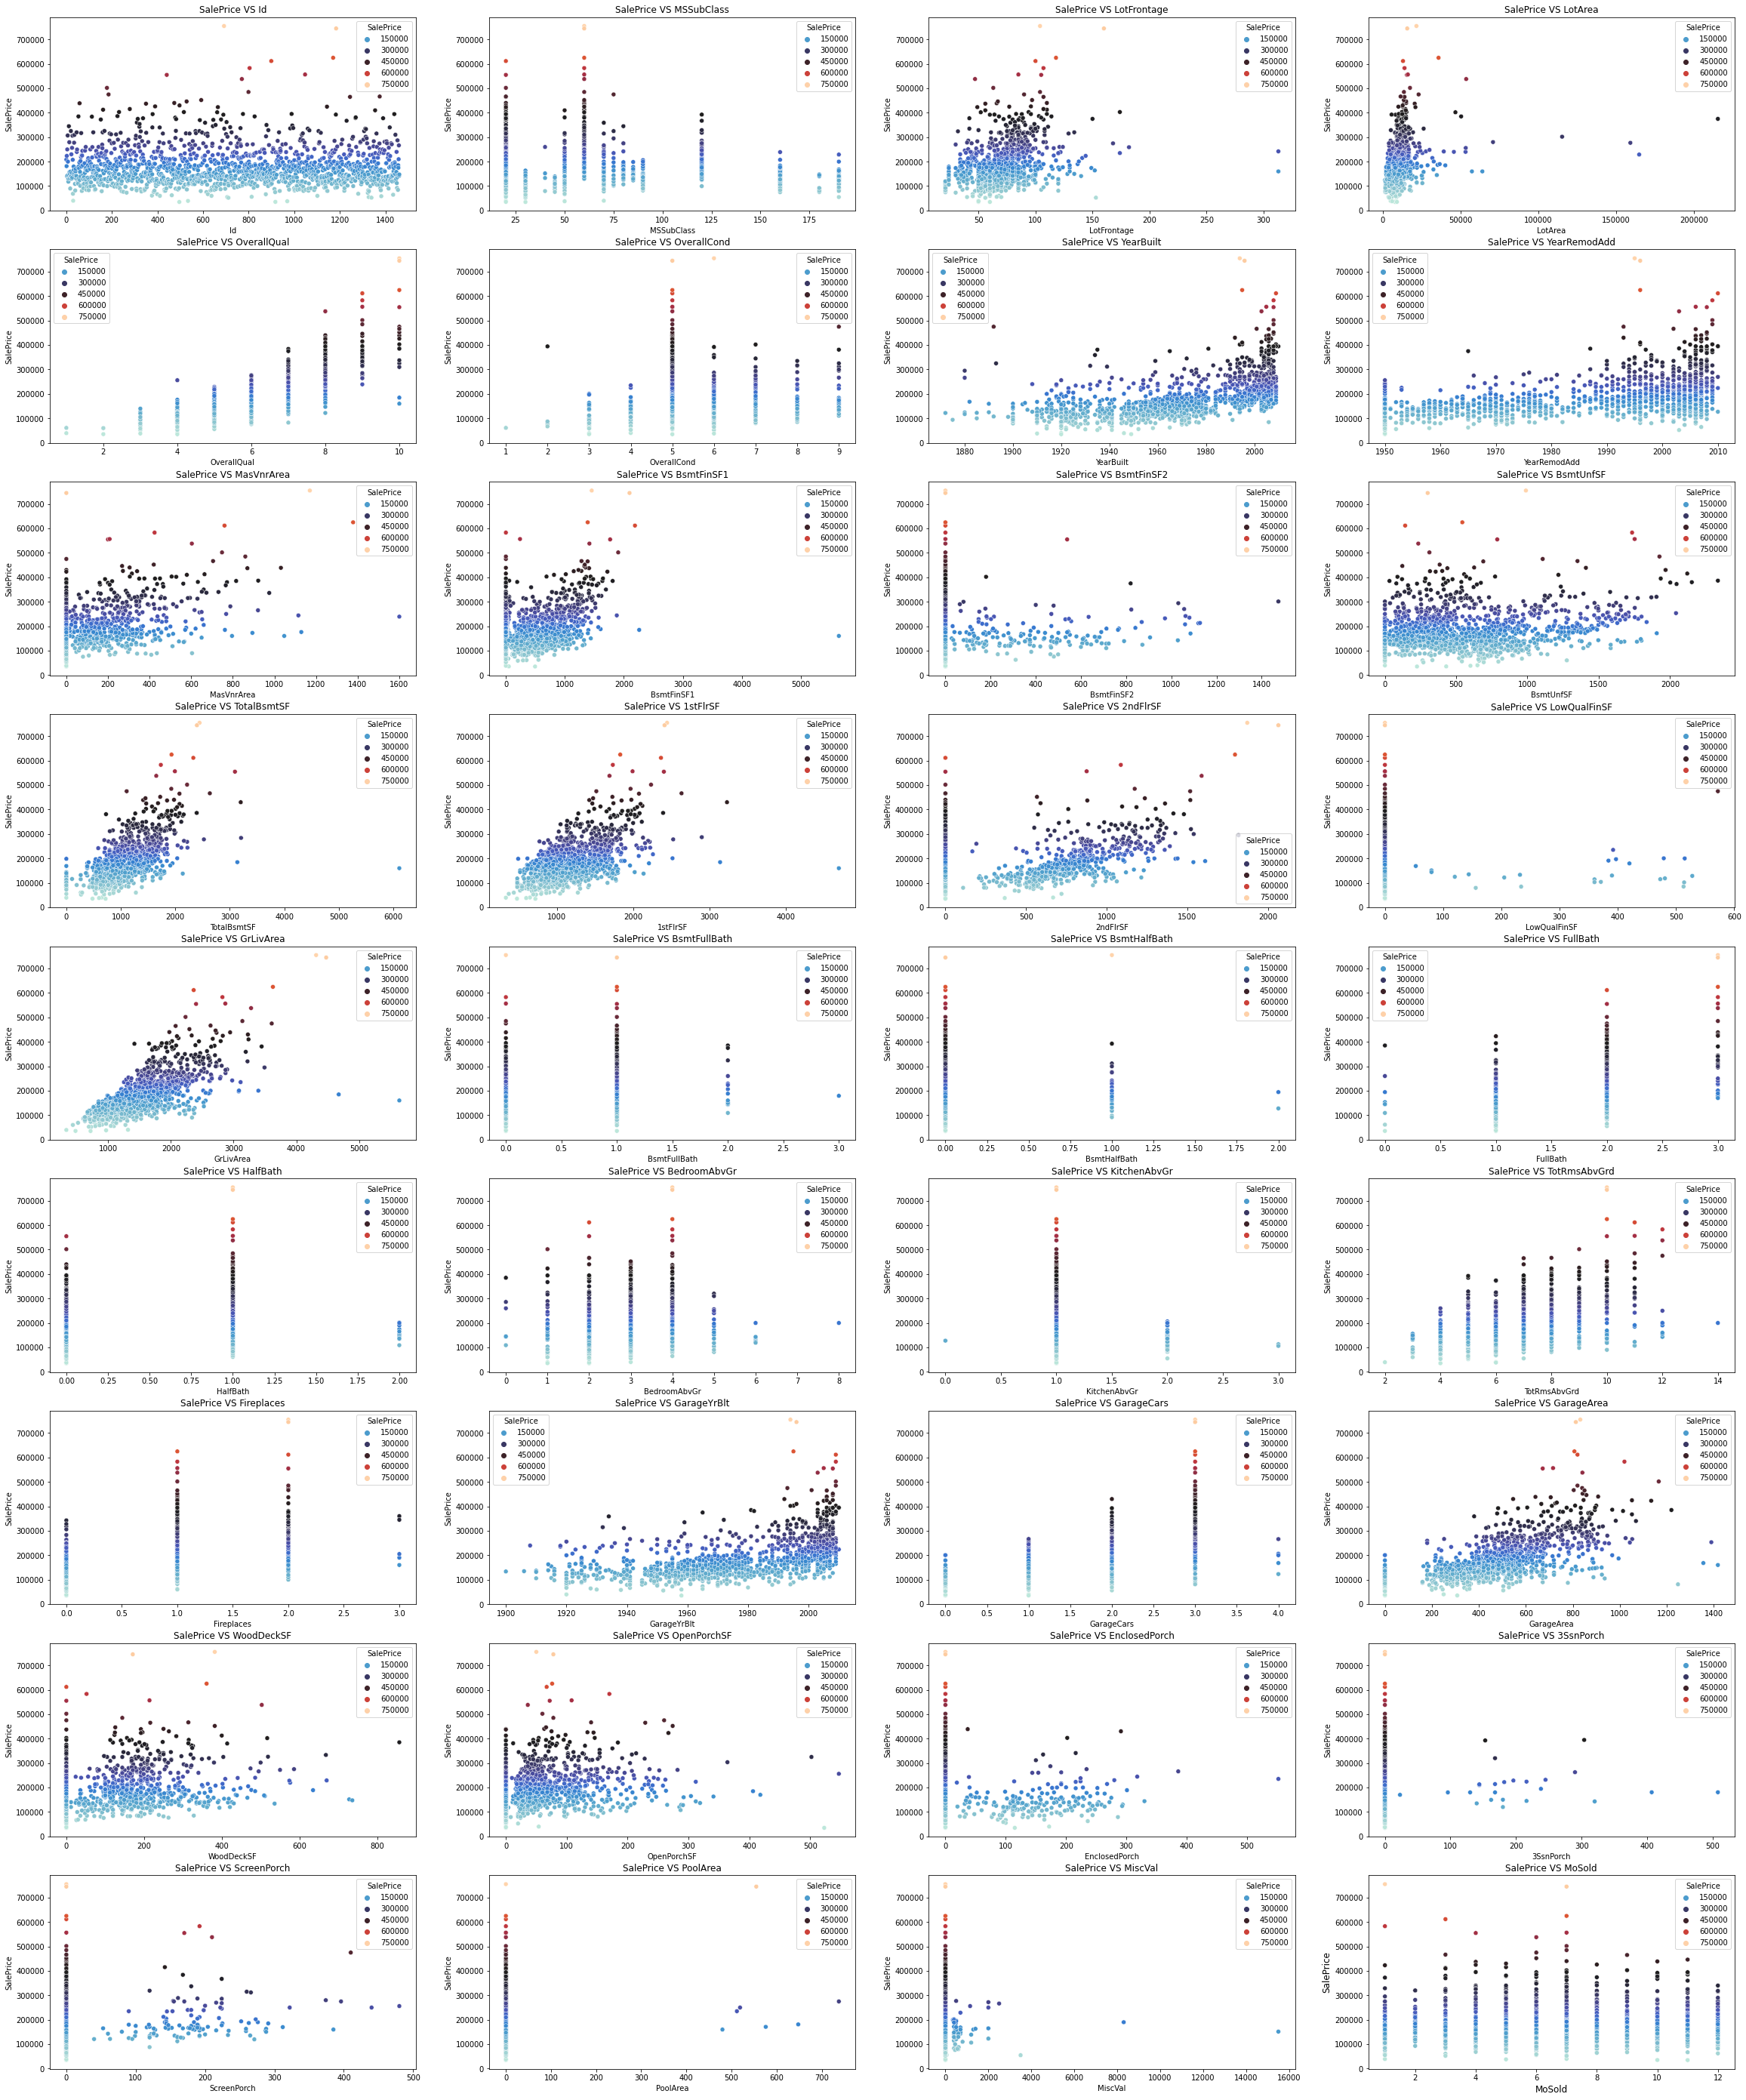

In [8]:
## Create scatter plots to further analyse the spread of data
## This should be viewd both in comparison to other features and individually
numericals = data.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(9,4,figsize=(40,50))
for i,ax in zip(numericals.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=numericals,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

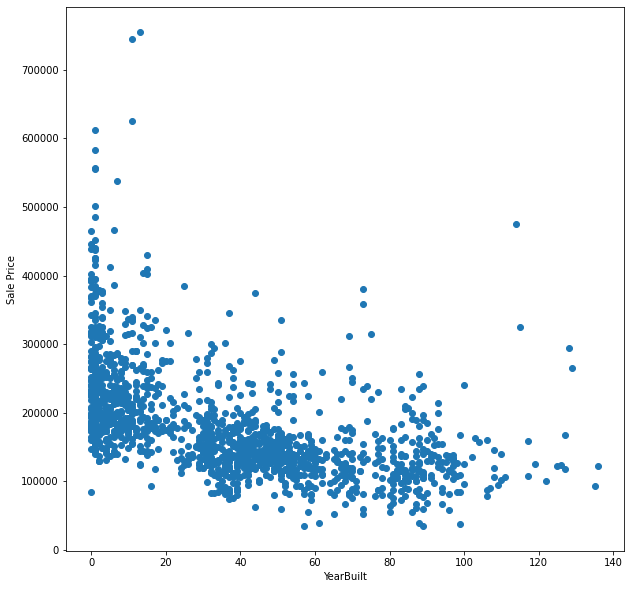

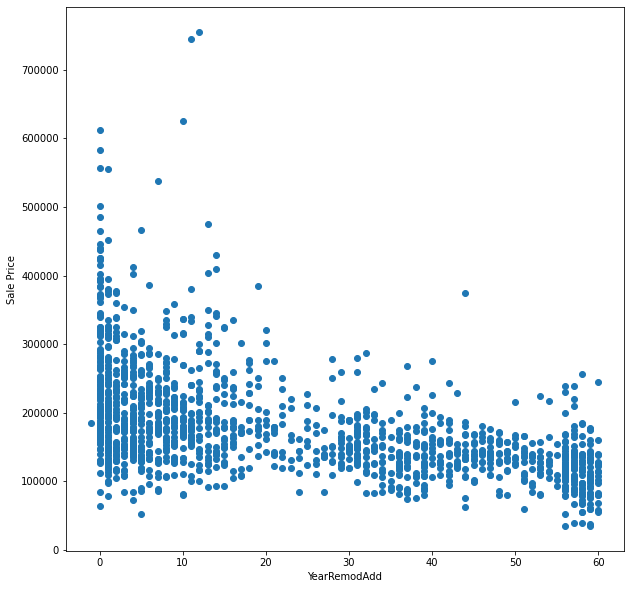

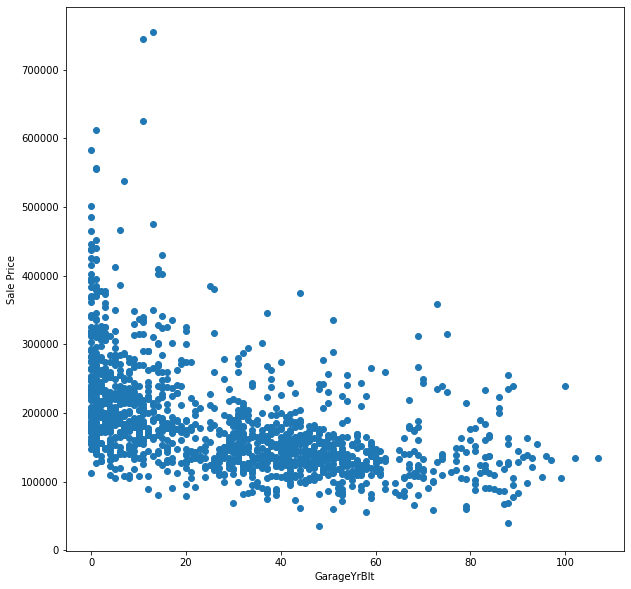

In [9]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for feature in year_features:
    if feature!='YrSold':
        data_temp=data.copy()
        plt.figure(figsize=(10,10))
        data_temp[feature]=data_temp['YrSold']-data[feature]
        plt.scatter(data_temp[feature],data_temp['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

<font color="blue"> 
1. We have observed several features have missing data
2. Based on the data disctionary we features have numerical variables in categorical features (MSSubClass)
3. ID contains only Unique Identification Numbers that will add no value to the Predications
4. Older Properties are cheaper than Newer Properties
5. Property Prices and Total Basement Area seem to be have a direct corelation. There is a Linear Relationship it seems.
Property Prices and GRLiving Area seem to be have a direct corelation


## Data Cleaning and Transformation

In [10]:
def missing_values(df):
   missing_data_ = pd.DataFrame({"Column":df.columns,"Missing %":['%.2f' % (a/len(df)*100) for a in df.isnull().sum()],
   "Feature":["Continuous" if df[col].dtype != 'O' else "Ordinal" for col in df.columns ]}) 
   return missing_data_

In [11]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

,Column,Missing %,Feature
72,PoolQC,99.52,Ordinal
74,MiscFeature,96.30,Ordinal
6,Alley,93.77,Ordinal
73,Fence,80.75,Ordinal
64,GarageCond,5.55,Ordinal
58,GarageType,5.55,Ordinal
59,GarageYrBlt,5.55,Continuous
60,GarageFinish,5.55,Ordinal
63,GarageQual,5.55,Ordinal
57,FireplaceQu,47.26,Ordinal


In [12]:
## Drop the ID Column
## This will not add value to the prediction of house prices
data.drop("Id",axis=1,inplace=True)

In [13]:
## Less than 1% of houses have pool (and pool area)
## These will not add to prediction of house prices
data.drop(["PoolQC","PoolArea"],axis=1,inplace=True)

In [14]:
## Convert Shed true / false value as 49 Houses have Sheds
data["Shed"]=np.where(data['MiscFeature']=='Shed',1,0)
data.drop("MiscFeature",axis=1,inplace=True)

In [15]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

,Column,Missing %,Feature
5,Alley,93.77,Ordinal
70,Fence,80.75,Ordinal
63,GarageCond,5.55,Ordinal
62,GarageQual,5.55,Ordinal
59,GarageFinish,5.55,Ordinal
58,GarageYrBlt,5.55,Continuous
57,GarageType,5.55,Ordinal
56,FireplaceQu,47.26,Ordinal
34,BsmtFinType2,2.60,Ordinal
31,BsmtExposure,2.60,Ordinal


### Individually Identify and Transform data as per Requirement

In [16]:
## Lot Frontage Stats
data.LotFrontage.describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
# Fill the null values for the features

fill_=["GarageType","Alley","Fence","FireplaceQu","BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond",
           "BsmtExposure","GarageFinish","GarageQual","GarageCond","MasVnrType"]
for f in fill_:
    data[f].fillna("No",inplace=True)

In [18]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

,Column,Missing %,Feature
58,GarageYrBlt,5.55,Continuous
2,LotFrontage,17.74,Continuous
25,MasVnrArea,0.55,Continuous
41,Electrical,0.07,Ordinal


In [19]:
## OverallQual: Catagorical variable with numeric catagories
## Convert Numbers to Categories
map_ = {1:"VP",2:"PO",3:"FA",4:"BA",5:"AV",6:"AA",7:"GO",8:"VG",9:"EX",10:"VE"}
data.OverallQual=data.OverallQual.map(map_)
data.OverallQual.value_counts()

AV    397
AA    374
GO    319
VG    168
BA    116
EX     43
FA     20
VE     18
PO      3
VP      2
Name: OverallQual, dtype: int64

In [20]:
## MSSubClass is a catagorical variable with numeric catagories
## Convert Numbers to Categories
## Value Count of the MSSubClass
print(sorted(data.MSSubClass.value_counts().index))

map_={20:"1storyNew",30:"1storyOld",40:"1storywAttic",45:"1_5storyUnF",50:"1_5storyF",60:"2storyNew",70:"2storyOld",75:"2_5story",
      80:"Multi",85:"Split",90:"Duplex",120:"1storyPUDnew",160:"2storyPUDnew",180:"PUDmulti",190:"2Family"}

data.MSSubClass = data.MSSubClass.map(map_)

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


In [21]:
## Value Count of the MSSubClass
data.MSSubClass.value_counts()

1storyNew       536
2storyNew       299
1_5storyF       144
1storyPUDnew     87
1storyOld        69
2storyPUDnew     63
2storyOld        60
Multi            58
Duplex           52
2Family          30
Split            20
2_5story         16
1_5storyUnF      12
PUDmulti         10
1storywAttic      4
Name: MSSubClass, dtype: int64

In [22]:
## Lot Frontage - Data stats
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

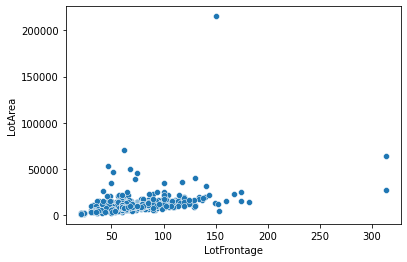

In [23]:
## Look for LotArea and Frontage Relationship
sns.scatterplot(data=data,x='LotFrontage',y='LotArea')

<font color="blue"> Quite a lot of otliers exist.

In [24]:
## Remove the outliers in LotFrontage
temp_df1 = data[data.LotArea<100000]
temp_df2 = temp_df1[temp_df1.LotFrontage<200]

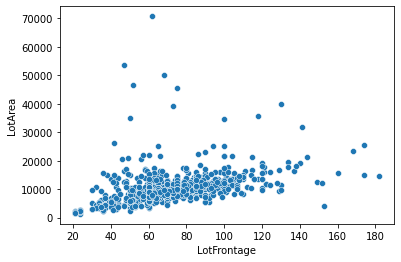

In [25]:
## Look for LotArea and Frontage Relationship again
sns.scatterplot(data=temp_df2,x='LotFrontage',y='LotArea')
plt.show()

In [26]:
## Fill up the remaining values as NA
data[data.LotFrontage.isna()].LotArea


7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1429    12546
1431     4928
1441     4426
1443     8854
1446    26142
Name: LotArea, Length: 259, dtype: int64

In [27]:
## Get Stats after NA
data[data.LotFrontage.isna()].LotArea.describe()

count       259.000000
mean      13137.370656
std       16215.264451
min        1974.000000
25%        8065.500000
50%       10624.000000
75%       13018.500000
max      164660.000000
Name: LotArea, dtype: float64

In [28]:
# Large Sperad of Data so we can use the technique of blocks for fill
data['Lotcat']=pd.cut(data.LotArea,bins=10,labels=[1,2,3,4,5,6,7,8,9,10],include_lowest=True)
data.LotFrontage=data.groupby('Lotcat')["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
data.drop("Lotcat",axis=1,inplace=True)

In [29]:
## Reevaluate Missing Values
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

,Column,Missing %,Feature
58,GarageYrBlt,5.55,Continuous
25,MasVnrArea,0.55,Continuous
2,LotFrontage,0.21,Continuous
41,Electrical,0.07,Ordinal


In [30]:
## Stats for GarageYrBlt
data[data.GarageYrBlt.isna()].YearBuilt.describe()

count      81.000000
mean     1942.481481
std        29.664841
min      1872.000000
25%      1920.000000
50%      1940.000000
75%      1970.000000
max      2007.000000
Name: YearBuilt, dtype: float64

In [31]:
## Fill GarageYrBlt
data[data.GarageYrBlt.isna()].YearBuilt.describe()


count      81.000000
mean     1942.481481
std        29.664841
min      1872.000000
25%      1920.000000
50%      1940.000000
75%      1970.000000
max      2007.000000
Name: YearBuilt, dtype: float64

In [32]:
## Stats for Electrical
data[data.Electrical.isna()].Electrical.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Electrical, dtype: object

In [33]:
## Fill data
data.Electrical.fillna(data.Electrical.mode(),inplace=True)

In [34]:
## Fill the NAs with the median value for the Electrical Feature
data.Electrical.fillna(data.Electrical.mode(),inplace=True)

In [35]:
## Imputing the YearBuilt in GarageBuilt
data.GarageYrBlt.fillna(data.YearBuilt,inplace=True) 

In [36]:
data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [37]:
data[data.LotFrontage.isna()].LotArea

249    159000
335    164660
706    115149
Name: LotArea, dtype: int64

In [38]:
## Drop Lot area larger than 100000
newdata = data[data.LotArea<100000]
data = newdata

In [39]:
## Update the null values where Masonry veneer is NA to 0
data.MasVnrArea.fillna(0,inplace=True)

In [40]:
## Check Missing Values
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

,Column,Missing %,Feature
41,Electrical,0.07,Ordinal
